In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Дискретное распределение

https://ru.wikipedia.org/wiki/Бета-распределение

Сгенерируем выборку объёма 1000 для бета-распределения с параметрами a и b:

In [374]:
a, b = 1, 2
custom_rv = sts.beta(a, b)
sample = custom_rv.rvs(1000)

В дальнейшем нам пригодятся величины матожидания и дисперсии для этого распределения:

In [375]:
mean = custom_rv.mean()
variance = custom_rv.var()

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины:

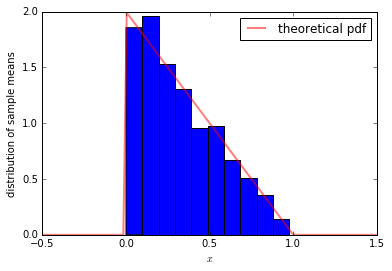

In [376]:
plt.hist(sample, normed=True)
plt.ylabel('distribution of sample means')
plt.xlabel('$x$')
x = np.linspace(-0.5,1.5,100)
pdf = custom_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5, linewidth = 2, color = "red")
plt.legend()

## Инструментарий

Подготовим набор функций, которые позволят нам максимально быстро отрисовывать требуемые графики.

Для начала, определим функцию, которая позволяет создать список из 1000 выборок длины n:

In [377]:
def create_sample_list(n):
    sample_list = []
    for i in range(1000) :
            appender = custom_rv.rvs(n)
            sample_list.append(np.array(appender))
    return sample_list

Далее определим функцию, которая поможет нам используя определённую выше функцию сгенерировать список из 1000 выборочных средних:

In [378]:
def create_mean_list(list):
    mean = []
    for elem in list:
        mean.append(elem.mean())
    return mean

Используем ее для определения функции, которая будет отображать гистограммы распределений выборочных средних, а также плотность соответствующего нормального распределения поверх каждой гистограммы.

При расчёте параметров соответствующего нормального распределения учтём, что согласно центральной предельной теореме 
$\bar {X}_{n}$  имеет распределение близкое к $N(\mu ,\sigma ^{2}/n)$ (это были выкладки)


In [379]:
def plot_hist_and_theoretical(n):
    # create data for plotting
    mean_list = create_mean_list(create_sample_list(n))
    # start a new plot
    plt.figure()
    #plot histogram
    plt.hist(mean_list, normed=True, bins=10)
    plt.ylabel('distribution of sample means')
    plt.xlabel('$x$')
    #plot theoretical normal
    # ЦПТ!!
    plt.title('Size = '+str(n)+', relevant normal distrib has mean = '+str(round(mean,2))+' and variance = '+str(round(variance/n, 5))+'\n')
    x = np.linspace(-0.5,1.5,100)
    # ЦПТ!!
    norm_rv = sts.norm(mean, np.sqrt(variance/n))
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='relevant normal pdf', alpha=0.5, linewidth = 3, color = "red")
    plt.legend()

Наконец, при помощи созданного нами инструментария, для выборок размером n (например, 1, 5, 15, 25, 35, 100), при помощи написанных функций отрисуем нужные нам графики:

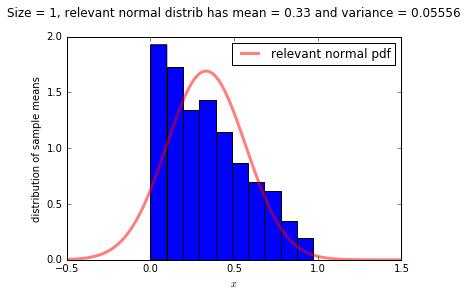

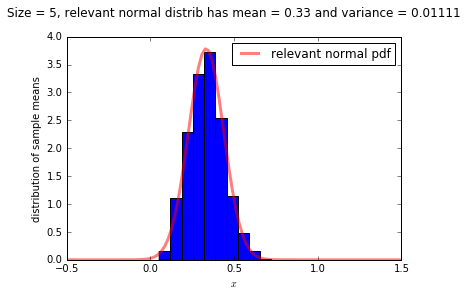

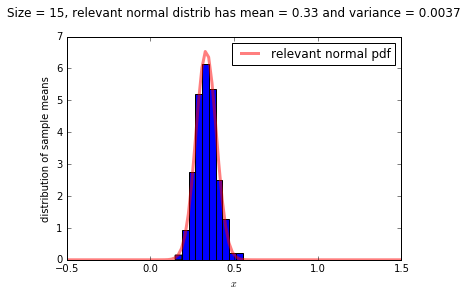

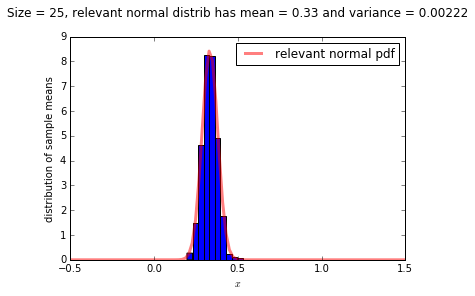

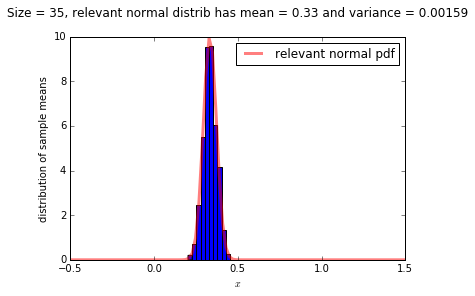

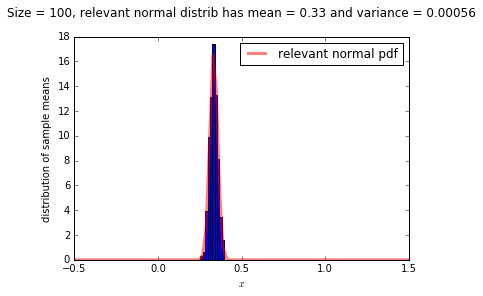

In [380]:
n_tuple = (1, 5, 15, 25, 35, 100)
for elem in n_tuple:
    plot_hist_and_theoretical(elem)

С увеличением длины выборок n, внешний вид гистограмм распределения выборочных средних становится всё более похожим на нормальное распределение. Матожидание соответствующего гистограммам нормального распределения не изменяется, а его дисперсия уменьшается пропорционально корню из длины выборки, т.е. грубо говоря график соответствующего нормального распределения сужается и вытягивается вверх. Тем самым, точность аппроксимации распределения выборочных средних нормальным распределением повышается с ростом n пропорционально корню из n, о чём и говорит центральная предельная теорема.